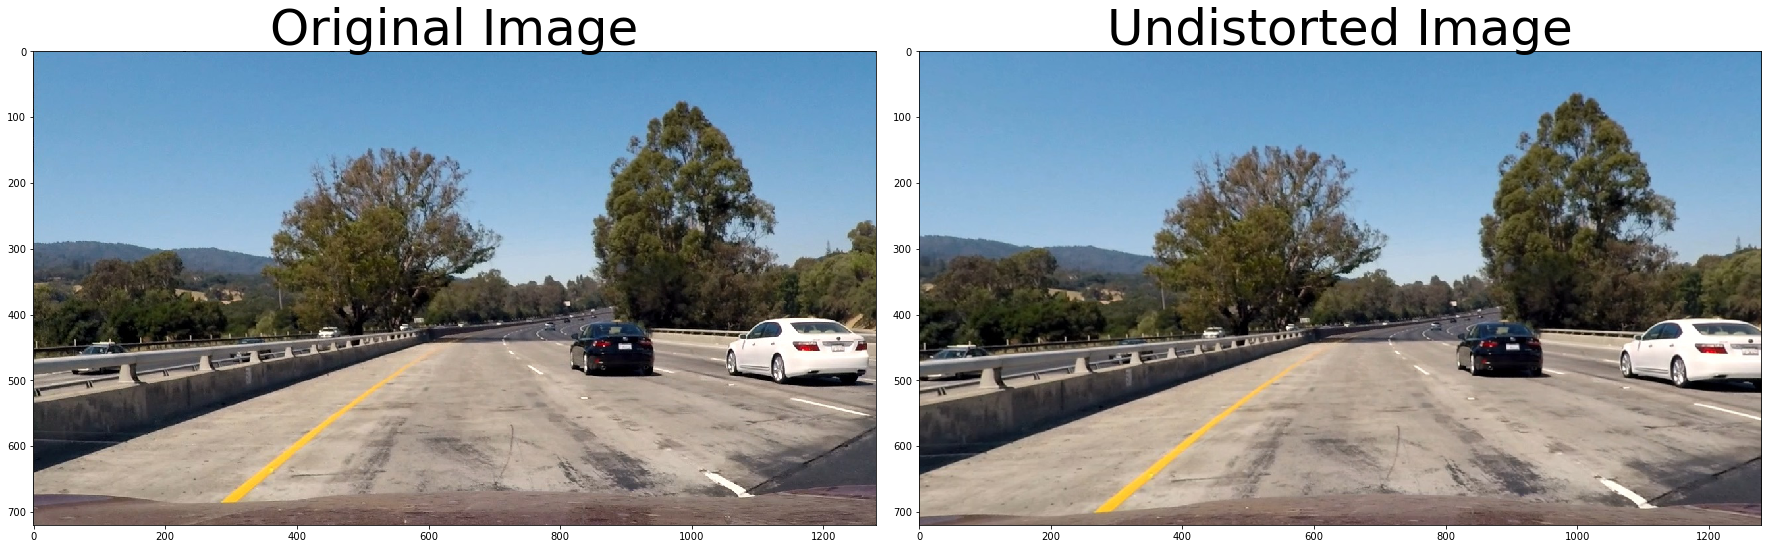

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

images=glob.glob(r'C:\Users\Hesham\Desktop\Lesson 4\Calibration\calibration*.jpg')


objpoints = []
imgpoints = []

objp= np.zeros((6*9,3),np.float32)
objp[:,:2]=np.mgrid[0:9,0:6].T.reshape(-1,2)

for fname in images:
    img=mpimg.imread(fname)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    if ret==True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        #img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

img=mpimg.imread(r'C:\Users\Hesham\Desktop\Lesson 4\test1.jpg')
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)